In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
training_df = pd.read_csv(r'C:\Desktop\AI_ML\INTRO_EXTRO_PROJECT\data\train.csv')
testing_df =  pd.read_csv(r'C:\Desktop\AI_ML\INTRO_EXTRO_PROJECT\data\test.csv')

In [4]:
training_df.head()#to see whether it contains null values or not

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
testing_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [6]:
#replacing the NaN values with the column's mean in training and testing data
for col in training_df.select_dtypes(include=float).columns:
    training_df[col] = training_df[col].fillna(training_df[col].mean())

for col in testing_df.select_dtypes(include=float).columns:
    testing_df[col] = testing_df[col].fillna(testing_df[col].mean())

#replacing the boolean column's nan values with column's mode

for col in training_df.select_dtypes(include=object).columns:
    print(col)
    training_df[col] = training_df[col].fillna(training_df[col].mode()[0])

for col in testing_df.select_dtypes(include=object).columns:
    print(col)
    testing_df[col] = testing_df[col].fillna(testing_df[col].mode()[0])


Stage_fear
Drained_after_socializing
Personality
Stage_fear
Drained_after_socializing


In [7]:
#now lets change the yes/no values to 1/0
X_train = training_df.copy()
X_train['Stage_fear'] = training_df['Stage_fear'].map({'Yes': 1, 'No': 0}) 
X_train['Drained_after_socializing'] = training_df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
#here we mapped extroVERTS to 1 and introVERTS to 0
X_train['Personality'] = training_df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [8]:
#not let's see the coorelation bw the columns how they are related to each other and by how much degree

correlation_mat = X_train.corr()
print(correlation_mat)

                                 id  Time_spent_Alone  Stage_fear  \
id                         1.000000         -0.000004   -0.000449   
Time_spent_Alone          -0.000004          1.000000    0.717709   
Stage_fear                -0.000449          0.717709    1.000000   
Social_event_attendance    0.002656         -0.584338   -0.642719   
Going_outside              0.004282         -0.590467   -0.640232   
Drained_after_socializing  0.000214          0.720775    0.775335   
Friends_circle_size        0.004210         -0.559073   -0.610209   
Post_frequency            -0.001880         -0.566516   -0.610634   
Personality               -0.001475         -0.752916   -0.816959   

                           Social_event_attendance  Going_outside  \
id                                        0.002656       0.004282   
Time_spent_Alone                         -0.584338      -0.590467   
Stage_fear                               -0.642719      -0.640232   
Social_event_attendance          

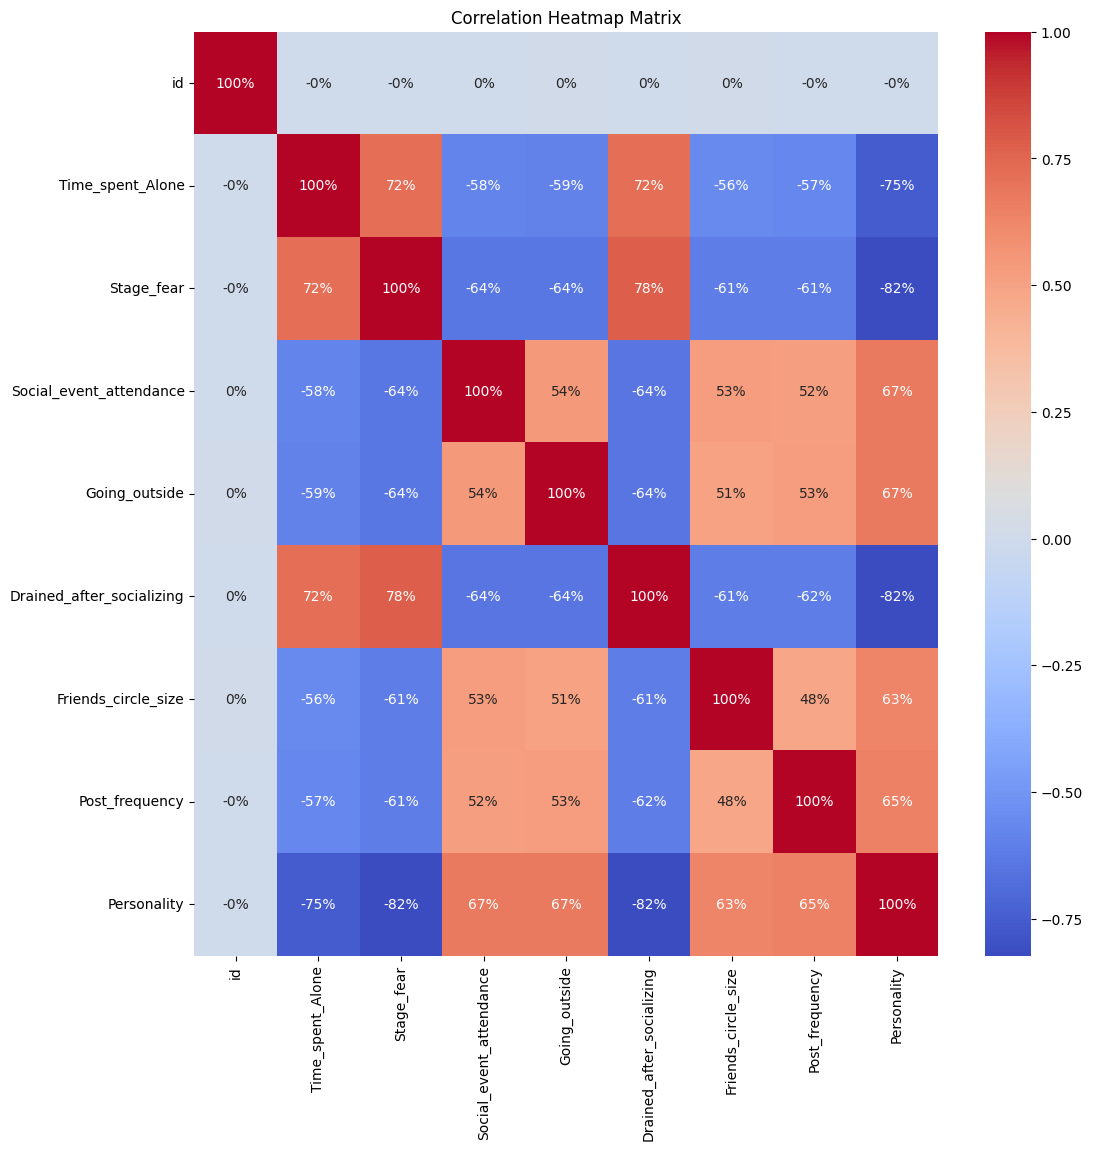

In [9]:
#from above o/p we can see that which factores affect the personality in which way 
#but lets visulaize it more clearly with heatmaps
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm',fmt='.0%')
plt.title('Correlation Heatmap Matrix')
plt.show()


In [10]:
#now lets map the yes/no values in testing data
X_test = testing_df.copy()
X_test['Stage_fear'] = testing_df['Stage_fear'].map({'Yes': 1, 'No': 0})
X_test['Drained_after_socializing'] = testing_df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

#dropping id from testing  data, don't worry we will get it later

X_test = X_test.drop(columns='id')

In [11]:
#removing id and personality from training data 
X_train = X_train.drop(columns='Personality')
X_train = X_train.drop(columns='id')
#we will get the personality in y_train from training_df

In [12]:
#now lets create the o/p which will be mapped with the i/p
y_train = training_df['Personality'].map({'Introvert': 0, 'Extrovert': 1})
#just for consistency i.e we will be using df's in this notebook
y_train = pd.DataFrame(data=y_train)

In [13]:
#now since some columns only range from 0-1 and some range from 0-20 so we need normalization
#which we will acheive using z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print(type(X_train))


<class 'numpy.ndarray'>


In [14]:
#since we need df for consistency therefor
X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [15]:
X_train.head()

,0,1,2,3,4,5,6
0,-1.079896,-0.526632,0.275846,-0.022392,-0.529975,1.707509,0.006442
1,-0.735735,-0.526632,0.651201,-0.527641,-0.529975,0.488428,1.085931
2,0.985070,1.898860,-1.600930,-2.043388,-0.529975,-1.218285,-1.792706
3,-0.047413,-0.526632,0.651201,-0.527641,-0.529975,0.732244,0.006442
4,-0.735735,-0.526632,-0.474864,-0.022392,-0.529975,1.219876,0.000000


In [16]:
y_train.head()

,Personality
0,1
1,1
2,0
3,1
4,1


In [17]:
l_model = LogisticRegression()
l_model.fit(X_train,y_train)

c:\Users\vtdha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
print(l_model.score(X_train,y_train))

0.9687432519974087


In [19]:
y_pred = l_model.predict(X_test)
print(type(y_pred))

<class 'numpy.ndarray'>


c:\Users\vtdha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [20]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,1
1,1
2,1
3,1
4,0


In [21]:
submission = pd.DataFrame()
submission['id'] = testing_df['id']
submission['Personality'] = y_pred 
submission['Personality'] = submission['Personality'].map({0: 'Introvert', 1: 'Extrovert'})
submission.to_csv('submission/submission.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'submission'